In [1]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [36]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv')
test_x = pd.read_csv('test_x.csv')
train_y = pd.read_csv('train_y.csv')
test_y = pd.read_csv('test_y.csv')

In [37]:
train_x.head(2)

,time,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),...,중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),hour,day,month
0,2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,0.0,2.4,...,0,2000,-6.9,-1.0,-0.8,0.3,1.6,1,1,1
1,2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,0.0,1.6,...,0,2000,-7.1,-1.1,-0.8,0.3,1.6,2,1,1


In [38]:
train_y.shape

(8591, 1)

---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [39]:
train_x.drop('time',axis=1, inplace=True)

In [40]:
test_x.drop('time',axis=1, inplace=True)

In [41]:
# LinearRegression 코드를 작성하세요.
train_x.info()
model = LinearRegression()
model.fit(train_x, train_y)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8591 entries, 0 to 8590
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            8591 non-null   float64
 1   CO             8591 non-null   float64
 2   O3             8591 non-null   float64
 3   NO2            8591 non-null   float64
 4   PM10           8591 non-null   float64
 5   PM25           8591 non-null   float64
 6   기온(°C)         8591 non-null   float64
 7   강수량(mm)        8591 non-null   float64
 8   풍속(m/s)        8591 non-null   float64
 9   풍향(16방위)       8591 non-null   float64
 10  습도(%)          8591 non-null   int64  
 11  증기압(hPa)       8591 non-null   float64
 12  이슬점온도(°C)      8591 non-null   float64
 13  현지기압(hPa)      8591 non-null   float64
 14  해면기압(hPa)      8591 non-null   float64
 15  전운량(10분위)      8591 non-null   float64
 16  중하층운량(10분위)    8591 non-null   int64  
 17  시정(10m)        8591 non-null   int64  
 18  지면온도(°C)

LinearRegression()

In [42]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(test_x)


In [43]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print(mse(test_y, y_pred_LR))
print(r2_score(test_y, y_pred_LR))

37.84466912250814
0.931349656425231


In [44]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(model, 'model_LinReg.pkl')



['model_LinReg.pkl']

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [45]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model =RFR()


model.fit(train_x, train_y)
y_pred_RF = model.predict(test_x)

<ipython-input-45-022458bed5bf>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


In [25]:
# Test 데이터로 성능을 평가해보세요.
print(mse(test_y, y_pred_RF))
print(r2_score(test_y, y_pred_RF))



42.11448438679245
0.9236041986978817


In [46]:
# 학습한 모델을 파일로 저장해보세요.

joblib.dump(model, 'model_RFR.pkl')

['model_RFR.pkl']

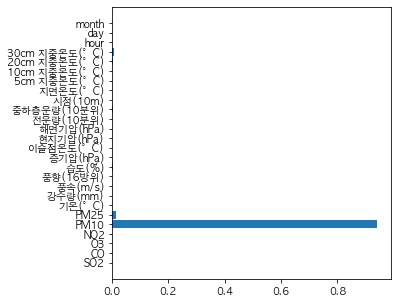

In [51]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(5, 5))
plt.barh(y=list(train_x), width=model.feature_importances_)
plt.show()


In [ ]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [66]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
model = GBR()
model.fit(train_x, train_y)
y_pred_RF = model.predict(test_x)

/Users/kimjoowhan/opt/anaconda3/envs/jh/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [53]:
# Test 데이터로 성능을 평가해보세요.
print(mse(test_y, y_pred_RF))
print(r2_score(test_y, y_pred_RF))



45.17925953320037
0.9180446873675214


In [65]:
# 학습한 모델을 파일로 저장해보세요.
import numpy as np
train_y = np.array(train_y)
train_y = np.ravel(train_y)
train_y = pd.DataFrame(train_y)

In [68]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인
train_y.head()



,0
0,27.0
1,23.0
2,24.0
3,26.0
4,27.0


In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.




In [ ]:
# Test 데이터로 성능을 평가해보세요.




In [ ]:
# 학습한 모델을 파일로 저장해보세요.




In [ ]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [ ]:
# Feature의 중요도 확인





In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

